<a href="https://colab.research.google.com/github/nhs-pycom/coding-club-IntroPython-5/blob/main/Copy_of_IntroPython_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The NHSX Analytics Unit introduction to Python Session 5**

Python for Data Analysis by Wes McKinney was used as a key resource for this session. 

This session focus on the basics of Pandas, a package similar to NumPy in that which contains tools and data structures for working with data. The big difference however, is that Pandas is designed for use with datasets containing multiple datatypes, aka heterogenous data. Pandas is a big topic, so I am going to focus on showing you the basic functionality in this session.



As Pandas is not part of base Python, it must be imported if we want to use any functions within it. Pandas is traditionally imported with the alias 'pd'.

Any function we use from pandas has to be proceeded by 'pd.' so Python knows to look in the Pandas package to find the function.


In [ ]:
import pandas as pd

# **11. Pandas Series:**

A Pandas series is a one dimensional object that contains a single data type, similar to an array. The key feature that separates it from an array is that the sequence of values has an associated sequence of labels. A good way to think of a series is a fancy numpy array, where each value in the array gets a name.

This is probably a good moment to also note that, confusingly, Pandas uses different names for data types than base python. They are mostly close enough to be obvious, with the exception of strings, which Pandas calls 'objects'.

##**Creating a Series**

We can create a series in lots of different ways, but here we will create one from a list using the Pandas Series function. 

We see the series in the output below, with the index on the left, and the values we specified on the right. It also tells us the data type of the series, which we can see Pandas correctly inferred was an integer, and so set to int64. 

If we change one of the inputs to a float, the dtype for the whole series will change to float64. This is because a series may only contain one data type. 

In [ ]:
#note the capitalisation on Series
demo_series = pd.Series([1337, 66, 42])
print(demo_series)

0    1337
1      66
2      42
dtype: int64


We can access the index and the values attributes of a series separately:

In [ ]:
print(demo_series.index)

print(demo_series.values)

RangeIndex(start=0, stop=3, step=1)
[1337   66   42]


As we did not define an index, Python created a default one in the form of a range-like object, with values from 0 to n-1.

If we want to specify the range instead of using a default one, we can do so as the series is created:

In [ ]:
demo_series = pd.Series([1337, 66, 42], index = ['a','b','c'])
print(demo_series)

a    1337
b      66
c      42
dtype: int64


In [ ]:
#We can also update the index of an existing series:
demo_series.index = ['d','e','f']
print(demo_series)

d    1337
e      66
f      42
dtype: int64


We can use the index to access specific values in the list.

In [ ]:
print(demo_series['f'])

42


In [ ]:
#we can pass multiple index values with a list
print(demo_series[['f','e']])

f    42
e    66
dtype: int64


In [ ]:
#Task 61: create a series of 5 items, which does not use the default index. Access an item in the list using its index.
eg_series = pd.Series([1,1,2,3,5], index = ['a','b','c', 'd', 'e'])
print(eg_series[['b']])

b    1
dtype: int64


In [ ]:
#Task 62: There are multiple ways to create a series. Try to make one out of this dictionary. Does anything interesting happen?
demo_dict = {"Bird": "Sparrow", "Mammal": "Dog", "Fish": "Cod"}
pd_dict = pd.Series(demo_dict)
print(pd_dict)

Bird      Sparrow
Mammal        Dog
Fish          Cod
dtype: object


You may not often see series' used on their own in Python. However, it was important to cover them, as they are the building blocks of Pandas most *exciting* feature.....

# **12. Pandas Dataframes:**

A dataframe is a two dimensional* table of data, similar to something you might work with in a spreadsheet. It can be thought of a a collection of series which all share the same index. 

Each series contains a single data type, but that can vary between series, meaning a dataframe as a whole can contain multiple datatypes.

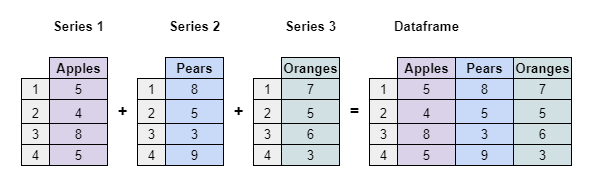

*dataframes can have more than two dimensions, but don't worry about that for now.

##**Creating a Dataframe**

Like series, dataframes can be created in lots of different ways. Here we are going to create one with a list of lists.

Each sub-list contains a row in the dataframe. As with series, we have to specify the index values or use the default values, but with a dataframe we have both the row and column names  to think about. 

I have specificed the column names, but I'm going to leave the row index as default as that seems appropriate for this data.

In [ ]:
#note the capitalisation in DataFrame
demo_df = pd.DataFrame([['joe',30,5],['jerry',40,6],['jemma',25,6]],columns=['name','age','height'])
print(demo_df)

    name  age  height
0    joe   30       5
1  jerry   40       6
2  jemma   25       6


In [ ]:
#Task 63: Create a dataframe with the following info. BONUS POINTS if you can do it using a dictionary or even a dictionary of dictionaries.
#remember that each column is a series
#Dog    age   colour
#Fido   2     grey 
#Spot   3     white
#Lassie 4     red
dict_fd ={"Fido": 2, "Spot": "3", "Lassie": 4}
dict_fd2 ={"Fido": "grey", "Spot": "white", "Lassie": "red"}

pd1 = pd.Series(dict_fd)
pd2=pd.Series(dict_fd2)
pd3=pd.concat([pd1, pd2], axis=1)

print(pd3)

        0      1
Fido    2   grey
Spot    3  white
Lassie  4    red


This is also probably a good point to untangle some ambiguous terminology. As we have seen, a dataframe has a set of row names and column names. These are sometimes both refererred to as an index. However, in a dataframe object, the row index attribute is simply called 'index', whereas the column index is called 'columns'.  I am going to stick to that for the rest of the session. 

Additionally, selecting particular sets of data is also sometimes called 'indexing', but I'm going to avoid that where possible. 

##**Importing a CSV file to a dataframe**

A extremely useful feature of Pandas is that is has a function which handles importing an external csv file into Python as a dataframe. Importing files in base python can be fiddly, but the Pandas function read_csv handles opening the file and copying the data with a single command.

In [ ]:
#The file we are using is stored on the github repo, so the file location is the url.
#If it was on your local machine, it would be the file path there instead, e.g. C:\desktop\people.csv.
#To save space, we'll store the url in a variable. 

file_location = "https://raw.githubusercontent.com/nhs-pycom/coding-club-IntroPython-5/main/people.csv"

demo_df2 = pd.read_csv(file_location)
print(demo_df2)

             Name   Age Favourite Colour Date of Birth Height     fsdaf     ID
0          Dallas  42.0              Red    29/06/1979  1,760  jhgjhgfj  B5443
1            Kane  39.0           Purple    29/06/1982  1,801   sffsdfd  H5655
2          Ripley  29.0           Orange    27/06/1992  1,650   ytryrty  Y4355
3             Ash  40.0            Green    01/07/1981  1,720     vbvcb  T5434
4         Lambert  26.0             Pink    29/06/1995  1,820     uiyui  B1123
5          Parker  27.0             Blue    30/06/1994  1,755    mnbmbm  R6954
6           Brett  30.0           Orange    02/07/1991  1,545    qwewqe  D5543
7           Jones   5.0             none    26/06/2016     20     qweqe  L6546
8     End of list   NaN              NaN           NaN    NaN       NaN    NaN
9  Really the end   NaN              NaN           NaN    NaN       NaN    NaN


The file has been read and loaded into a dataframe successfully, but we can see that the data is quite messy and needs some cleaning. Fortunately, *read_csv* has lots of ways that you can use to help it understand how you want it to read the data. 

To start with, there are rows of junk text at the end of this file. We can use *skipfooter* to tell it to ignore them. Additionally there is a column that contains nonsense. We can exclude that using the *usecol* argument to specify which columns we do want. 

It also looks like the column ID might be appropriate to use as an index, so lets tell the function to use that instead of generating a default one, using 'index_col'.

(Setting the engine to python is required to prevent an warning related to the skipfooter argument, don't worry about that at this point). 

In [ ]:
demo_df2 = pd.read_csv(file_location, skipfooter=2, engine='python', index_col='ID',
usecols=['ID', 'Name', 'Age', 'Favourite Colour', 'Date of Birth', 'Height'])

print(demo_df2 , "\n")

demo_df2.dtypes

          Name  Age Favourite Colour Date of Birth Height
ID                                                       
B5443   Dallas   42              Red    29/06/1979  1,760
H5655     Kane   39           Purple    29/06/1982  1,801
Y4355   Ripley   29           Orange    27/06/1992  1,650
T5434      Ash   40            Green    01/07/1981  1,720
B1123  Lambert   26             Pink    29/06/1995  1,820
R6954   Parker   27             Blue    30/06/1994  1,755
D5543    Brett   30           Orange    02/07/1991  1,545
L6546    Jones    5             none    26/06/2016     20 



Name                object
Age                  int64
Favourite Colour    object
Date of Birth       object
Height              object
dtype: object

This looks a lot better, we have gotten rid of the junk rows, excluded the column we don't want, and set the index appropriately. 

However, the dtypes attribute shows that the DOB and Height columns have been read as objects (aka strings). We may want to perform operations on these columns, so need them set to the proper datatypes. 

We can use *parse_dates* to tell Pandas to treat the DOB column as a datetime object. 

The Height column is being read as an object because it contains commas. We can tell Pandas the commas are just thousand dividers using the argument *thousands*. 

In [ ]:
demo_df2 = pd.read_csv(file_location, parse_dates=["Date of Birth"], thousands=",", skipfooter=2, engine='python',
index_col='ID', usecols=['ID', 'Name', 'Age', 'Favourite Colour', 'Date of Birth', 'Height'])

print(demo_df2, "\n")

print(demo_df2.dtypes)

          Name  Age Favourite Colour Date of Birth  Height
ID                                                        
B5443   Dallas   42              Red    1979-06-29    1760
H5655     Kane   39           Purple    1982-06-29    1801
Y4355   Ripley   29           Orange    1992-06-27    1650
T5434      Ash   40            Green    1981-01-07    1720
B1123  Lambert   26             Pink    1995-06-29    1820
R6954   Parker   27             Blue    1994-06-30    1755
D5543    Brett   30           Orange    1991-02-07    1545
L6546    Jones    5             none    2016-06-26      20 

Name                        object
Age                          int64
Favourite Colour            object
Date of Birth       datetime64[ns]
Height                       int64
dtype: object


Now all of our columns are the correct datatype. There are many more arguments not covered here that can be used to deal with messy csv data.

In [ ]:
#Task 64. Here is the URL for a dataset we're going to be looking at later on. Load it into a dataframe called "cereal_df"
https://raw.githubusercontent.com/nhs-pycom/coding-club-IntroPython-5/main/cereal.csv

##**Examining a Dataframe**

Here are a few useful commands you can use to examine a dataframe:

In [ ]:
#Returns the top 5 rows in a dataframe. Tail does the same for the last 5 rows. 
demo_df2.tail(10)

,Name,Age,Favourite Colour,Date of Birth,Height
ID,,,,,
B5443,Dallas,42,Red,1979-06-29,1760
H5655,Kane,39,Purple,1982-06-29,1801
Y4355,Ripley,29,Orange,1992-06-27,1650
T5434,Ash,40,Green,1981-01-07,1720
B1123,Lambert,26,Pink,1995-06-29,1820
R6954,Parker,27,Blue,1994-06-30,1755
D5543,Brett,30,Orange,1991-02-07,1545
L6546,Jones,5,none,2016-06-26,20


In [ ]:
#provides descriptive stats for each column. Only includes numeric columns unless you use the  argument. Only certain stats can be applied to non-numeric fields.
demo_df2.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Name,Age,Favourite Colour,Date of Birth,Height
count,8,8.000000,8,8,8.000000
unique,8,NaN,7,8,NaN
top,Brett,NaN,Orange,1994-06-30 00:00:00,NaN
freq,1,NaN,2,1,NaN
first,NaN,NaN,NaN,1979-06-29 00:00:00,NaN
last,NaN,NaN,NaN,2016-06-26 00:00:00,NaN
mean,NaN,29.750000,NaN,NaN,1508.875000
std,NaN,11.804963,NaN,NaN,608.079045
min,NaN,5.000000,NaN,NaN,20.000000
25%,NaN,26.750000,NaN,NaN,1623.750000


In [ ]:
#can also produce stats for individual columns. These are useful if you want to assign them to a variable and use as an input elsewhere. 
a = demo_df2['Height'].max()
b = demo_df2['Height'].mean()

print("Max:", round(a,1), " Mean:", round(b,1))

Max: 1820  Mean: 1508.9


In [ ]:
#Task 65: calculating the range of the age column by finding the max, and deducting the min from it. 
range_age = demo_df2['Age'].max() - demo_df2['Age'].min()
range_age


AttributeError: ignored

##**Appending and Dropping rows and columns**



A new column can be easily added by picking a name and assigning some data. Here we have added a rank column to the dataframe.

In [ ]:
ranks = ['Captain', 'Executive Officer', "Warrant Office", "Science Officer", "Navigator", "Chief Engingeer", "Engineering Technician", "Cat"]

demo_df2['Rank'] = ranks
print(demo_df2)

          Name  Age  ... Height                    Rank
ID                   ...                               
B5443   Dallas   42  ...   1760                 Captain
H5655     Kane   39  ...   1801       Executive Officer
Y4355   Ripley   29  ...   1650          Warrant Office
T5434      Ash   40  ...   1720         Science Officer
B1123  Lambert   26  ...   1820               Navigator
R6954   Parker   27  ...   1755         Chief Engingeer
D5543    Brett   30  ...   1545  Engineering Technician
L6546    Jones    5  ...     20                     Cat

[8 rows x 6 columns]


In [ ]:
demo_df2_new_row = pd.DataFrame([['Xeno',1,'red','29/06/1982', 'acid', 1900, 'Stowaway']], columns =['Name', 'Age', 'Favourite Colour', 'Date of Birth', 'Blood Type', 'Height', 'Rank'], index = ["99999"])
demo_df2_new_row["Date of Birth"] = pd.to_datetime(demo_df2_new_row["Date of Birth"])  

demo_df2.append(demo_df2_new_row)

,Name,Age,Favourite Colour,Date of Birth,Height,Rank,Blood Type
B5443,Dallas,42,Red,1979-06-29,1760,Captain,NaN
H5655,Kane,39,Purple,1982-06-29,1801,Executive Officer,NaN
Y4355,Ripley,29,Orange,1992-06-27,1650,Warrant Office,NaN
T5434,Ash,40,Green,1981-01-07,1720,Science Officer,NaN
B1123,Lambert,26,Pink,1995-06-29,1820,Navigator,NaN
R6954,Parker,27,Blue,1994-06-30,1755,Chief Engingeer,NaN
D5543,Brett,30,Orange,1991-02-07,1545,Engineering Technician,NaN
L6546,Jones,5,none,2016-06-26,20,Cat,NaN
99999,Xeno,1,red,1982-06-29,1900,Stowaway,acid


If we have another dataframe with the same columns, we can append it to the end of our dataframe. with the .append method. Any columns not present in the original will be added to the original dataframe and populated with nulls.

The process creates a new object rather than updating the original. If we wanted to make this change permanent, we would need to assign the output of this process back to the original dataframe name. 


You can drop a row or column using its index using the drop method. You specify if it is a row (axis = 0) or column (axis = 1).

In [ ]:
demo_df2.drop('Age', axis = 1)

In [ ]:
#If you add the argument inplace=True, the method will modify the actual dataframe, rather than creating a new one. 
#Be careful though, this means the element you drop is permanently gone. We will make a copy of our dataframe to do this. 
demo_df2_copy = demo_df2.copy()

demo_df2_copy.drop('H5655', axis = 0, inplace = True)
print(demo_df2_copy)

          Name  Age  ... Height                    Rank
ID                   ...                               
B5443   Dallas   42  ...   1760                 Captain
H5655     Kane   39  ...   1801       Executive Officer
Y4355   Ripley   29  ...   1650          Warrant Office
T5434      Ash   40  ...   1720         Science Officer
B1123  Lambert   26  ...   1820               Navigator
R6954   Parker   27  ...   1755         Chief Engingeer
D5543    Brett   30  ...   1545  Engineering Technician
L6546    Jones    5  ...     20                     Cat

[8 rows x 6 columns]


In [ ]:
#Task 66: drop Lambert's entry, and the height column, from the copy of the dataframe.
#demo_df2_copy.drop('B1123', axis = 0, inplace = True)
#demo_df2_copy.drop('Height', axis = 1, inplace = True)
print(demo_df2_copy)

         Name  Age Favourite Colour Date of Birth                    Rank
ID                                                                       
B5443  Dallas   42              Red    1979-06-29                 Captain
H5655    Kane   39           Purple    1982-06-29       Executive Officer
Y4355  Ripley   29           Orange    1992-06-27          Warrant Office
T5434     Ash   40            Green    1981-01-07         Science Officer
R6954  Parker   27             Blue    1994-06-30         Chief Engingeer
D5543   Brett   30           Orange    1991-02-07  Engineering Technician
L6546   Jones    5             none    2016-06-26                     Cat


##**Selecting Data In a Dataframe** 

The mechanisms to select data from a dataframe are a bit unintuitive. However, learning them properly can help to mitigate that. 

You can select data by passing one or more column names. However, this only works for columns, and passing row indexes will result in an error. 

In [ ]:
print(demo_df2['Name'])

print(demo_df2[['Name','Age']])

ID
B5443     Dallas
H5655       Kane
Y4355     Ripley
T5434        Ash
B1123    Lambert
R6954     Parker
D5543      Brett
L6546      Jones
Name: Name, dtype: object
          Name  Age
ID                 
B5443   Dallas   42
H5655     Kane   39
Y4355   Ripley   29
T5434      Ash   40
B1123  Lambert   26
R6954   Parker   27
D5543    Brett   30
L6546    Jones    5


In [ ]:
#EXCEPTION1 - Passing it a slice will give you rows. This is both annoying and useful. 
demo_df2[3:6]

,Name,Age,Favourite Colour,Date of Birth,Height,Rank
ID,,,,,,
T5434,Ash,40,Green,1981-01-07,1720,Science Officer
B1123,Lambert,26,Pink,1995-06-29,1820,Navigator
R6954,Parker,27,Blue,1994-06-30,1755,Chief Engingeer


In [ ]:
#EXCEPTION2 - passing it a boolean sequence will also give you rows (more on this later)
demo_df2[[True, True, False, False, False, True, True, True]]

,Name,Age,Favourite Colour,Date of Birth,Height,Rank
ID,,,,,,
B5443,Dallas,42,Red,1979-06-29,1760,Captain
H5655,Kane,39,Purple,1982-06-29,1801,Executive Officer
R6954,Parker,27,Blue,1994-06-30,1755,Chief Engingeer
D5543,Brett,30,Orange,1991-02-07,1545,Engineering Technician
L6546,Jones,5,none,2016-06-26,20,Cat


However, you are probably going to want to do more complex selection than that at some point. Which is where the **.loc** and **.iloc** methods comes in.  

loc allows you to select a chunk of a dataframe via the index (rows) and column names. iloc allows you to do the same, but with integers representing the position within the datframe. 


In [ ]:
#loc allows you to specify row names and columns names (always in that order). You can pass a single value or a list for either:
demo_df2.loc['B5443',['Name','Age','Height']]

Name      Dallas
Age           42
Height      1760
Name: B5443, dtype: object

In [ ]:
#iloc allows you to specify row and column numbers. You can also pass a slice here:
demo_df2.iloc[3:6,4]

ID
T5434    1720
B1123    1820
R6954    1755
Name: Height, dtype: int64

In [ ]:
#you can also combine them, but this is frowned upon and you may be sent to Python jail. 
demo_df2.iloc[:,0:4].loc[['T5434','B1123'],:]

,Name,Age,Favourite Colour,Date of Birth
ID,,,,
T5434,Ash,40,Green,1981-01-07
B1123,Lambert,26,Pink,1995-06-29


**Conditional selection** is a very useful technique which allows you to select data based on some criteria. The mechanism was covered in the last session, whereby you create a sequence of boolean values, which are used to select rows. 



In [ ]:
#this line of code produces series of boolean values. The value is true where the Age is geater than 30. 
demo_df2['Age'] >30

ID
B5443     True
H5655     True
Y4355    False
T5434     True
B1123    False
R6954    False
D5543    False
L6546    False
Name: Age, dtype: bool

In [ ]:
#If we use that code as an input to the index, the list of boolean values is used to select rows from the data table,
#returning each row that meets that criteria. THis is very useful for filtering data. 
demo_df2[demo_df2['Age'] >30]

,Name,Age,Favourite Colour,Date of Birth,Height,Rank
ID,,,,,,
B5443,Dallas,42,Red,1979-06-29,1760,Captain
H5655,Kane,39,Purple,1982-06-29,1801,Executive Officer
T5434,Ash,40,Green,1981-01-07,1720,Science Officer


In [ ]:
#you can add multiple criteria
demo_df2[(demo_df2['Age'] >30) & (demo_df2['Height'] >1750)]

,Name,Age,Favourite Colour,Date of Birth,Height,Rank
ID,,,,,,
B5443,Dallas,42,Red,1979-06-29,1760,Captain
H5655,Kane,39,Purple,1982-06-29,1801,Executive Officer


In [ ]:
#And even do it with partial strings by using 'str.contains'
demo_df2[demo_df2['Name'].str.contains('ne')]

,Name,Age,Favourite Colour,Date of Birth,Height,Rank
ID,,,,,,
H5655,Kane,39,Purple,1982-06-29,1801,Executive Officer
L6546,Jones,5,none,2016-06-26,20,Cat


In [ ]:
#We are going to use the dataset we imported earlier  which contains nutritional info for cereals. If you didn't complete that task, the code to do it is here:
file_location = "https://raw.githubusercontent.com/nhs-pycom/coding-club-IntroPython-5/main/cereal.csv"
cereal_df = pd.read_csv(file_location, index_col = 'name')
cereal_df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
#Tasks 
#67) Drop the entry for 'Raisin Bran' from the dataframe
cereal_df.drop('Raisin Bran', axis = 0, inplace = True)

In [ ]:
#68) Find which has higher sugar content, Cocoa Puffs or Wheaties?
a = cereal_df.loc[['Cocoa Puffs','Wheaties'],'sugars']
a

name
Cocoa Puffs    13
Wheaties        3
Name: sugars, dtype: int64

In [ ]:
#69) Return every cereal name that contains 'bran'. Remember the name column has been assigned as the index!
cereal_df.filter(like = 'Bran', axis=0)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


In [ ]:
#70) Return details for all cereals that have a higher than average protein content
cereal_df[cereal_df['protein'] >cereal_df['protein'].mean()]

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
Clusters,G,C,110,3,2,140,2.0,13.0,7,105,25,3,1.00,0.50,40.400208
Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
